<a href="https://colab.research.google.com/github/muyiwa-obadara/AIPlanetProjects/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis - AIPlanet**

---

Here, the wine quality dataset was explored for insights.

### Setup

In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv", sep=";")

### Exploratory Data Analysis
**Initial Review** We study the structure of the data, by sight and sumary statistics.


#### Head
We check the first n entries (`n = 5`, by default). This enables us to get a feel of the structure of the data.

In [3]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Shape
With the `.shape()` methos, we obtain the numbe4r of rows and columns.

In [4]:
wine_data.shape

(1599, 12)

#### Describe
The `describe()` method of a dataframe is only applied to numerical data. It enables us to compute the minimum, maimum, quartiles, count, and standard deviation of each numerical column. A significant difference between the mean and median suggests an outlier.

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Exploring the columns of the Dataset
We can also view the column names of each feature/attribute. This is a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object.

In [6]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Target Variable
---
Our target variable is the wine **quality**. We want to know which of the two types of wine has a better quality. This is the variable for which we want a deeper understanding.

#### Predictor Variables
---
All other variables are predictor ariables or features. All of these will help us to predict the quality of the particular wine instance, when the quality is not known. It is not a good habit to throw the features into the model without understanding them first.

#### Unique wine qualities

Since the wine qualities are given as discrete values, between 0 and 10, this is a classification problem. We need to check the number of unique values given by the consumers who have rate the wine.

In [7]:
wine_data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

The consumers who rate the wine do not all give a range between $0$ and $10$.

We now count the number of consumers which give a particular rating.

We will also rename columns that have spaces between their names, by replacing the spaces with an underscore.

In [8]:
wine_data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
wine_data.rename(columns={
    "fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
    "free sulfur dioxide": "free_sulfur_dioxide",
    "total sulfur dioxide": "total_sulfur_dioxide"
}, inplace=True)

#### Checkig for missing values

We use `df.isna()`, `df.isnull()` to check for missing values. It returns a boolean, `True/False`, per data entry. The opposite is `df.notna()`. We can further use `.any()` or `.sum()` to check if the column (series) has at least one na value or the total na value respectively.

We then use `df.info()` to check the structure of each columns such as the data type in each column and the number of missing value in each column including the total number of instances.

In [10]:
wine_data.isna()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
wine_data.isna().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### Handling Duplicates

The effect of duplicated entries may affect the dataset or not. The effect depends on the context. If it is reasonable to have duplicate values, then, we do not ne4ed to delete duplicated entries. Duplicated data are detected as below.

In [12]:
duplicated_data = wine_data[wine_data.duplicated()]
duplicated_data.shape

(240, 12)

There are $240$ duplicated entries, but according to the data and the context, it is possible for many conumers who consumes the same type of wine to give the same rating.

### Graphical Techniques
Pur brains are good at spotting patterns in pictures. Interestingly, we have plotting and graphic libraries which enables us to visualize data easily.

Wait! We need to separate the input features from the output target. Convetionally, input data is typically a matrix while an output is in form of a vector. This obeys the maping rule in algebra, where a function maps inputs to a unique value.

In [13]:
target = "quality"
features = wine_data.columns.drop("quality").to_list()

In [14]:
X = wine_data[features]
y = wine_data[target]

In [15]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

#### Histogram

An histogram is used to visualize numerical data. It divides the data into numerical intervals called bins.

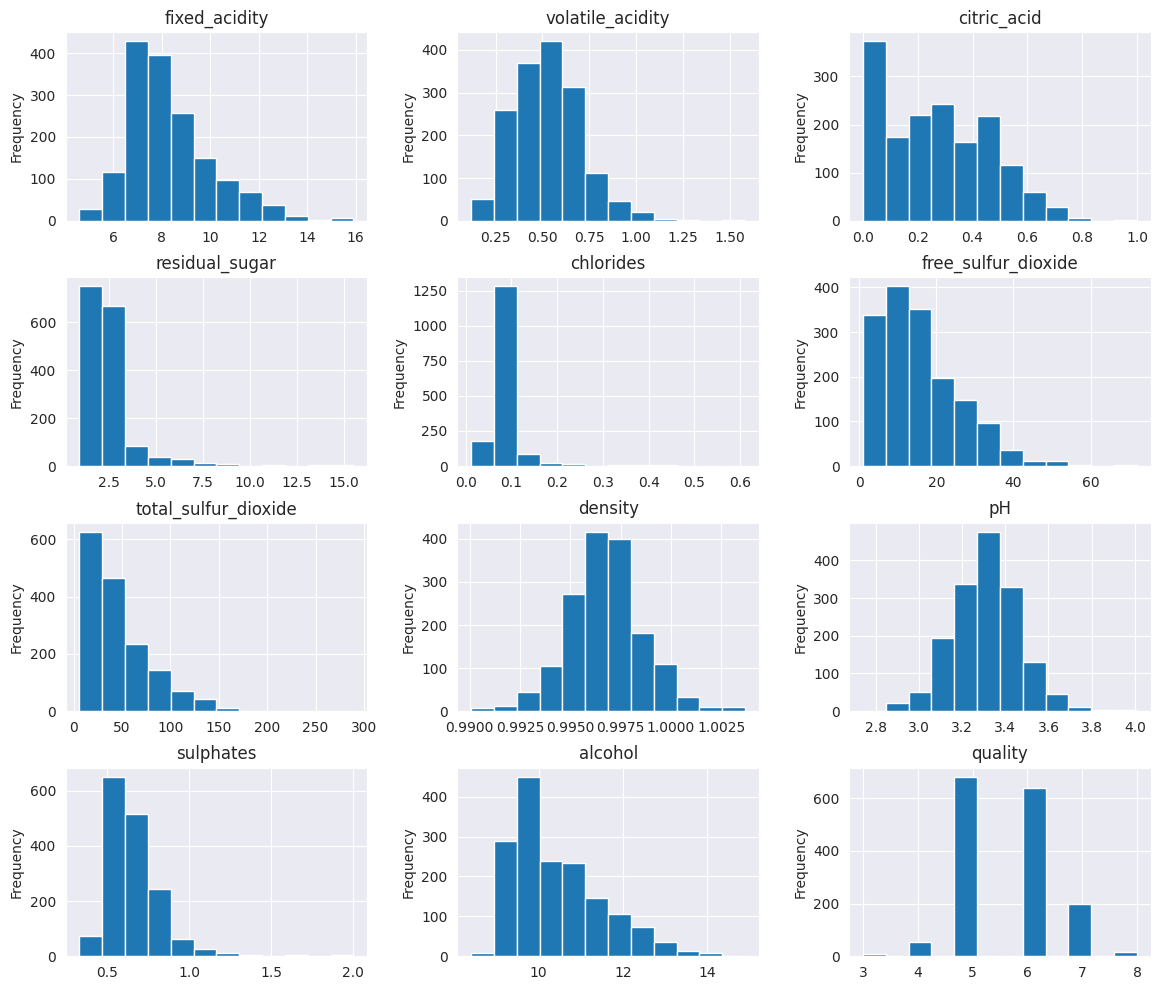

In [25]:
axs = wine_data.hist(bins=12, figsize=(14,12))
for axx in axs:
    for ax in axs:
        for axis in ax:
            axis.yaxis.set_label_text("Frequency")

#### Correlation

We can check how each variable is correlated to the other, using the `.corr()` method of pandas. Not only the relationship with the output need to be analysed, but how the data relates woth each other.

We wivw the correlation of each data to the other in the table below. the table below is a table which summarized it. It is called a correlation matrix.

We then view this graphically.

In [27]:
wine_data_corr = wine_data.corr()

In [28]:
wine_data_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

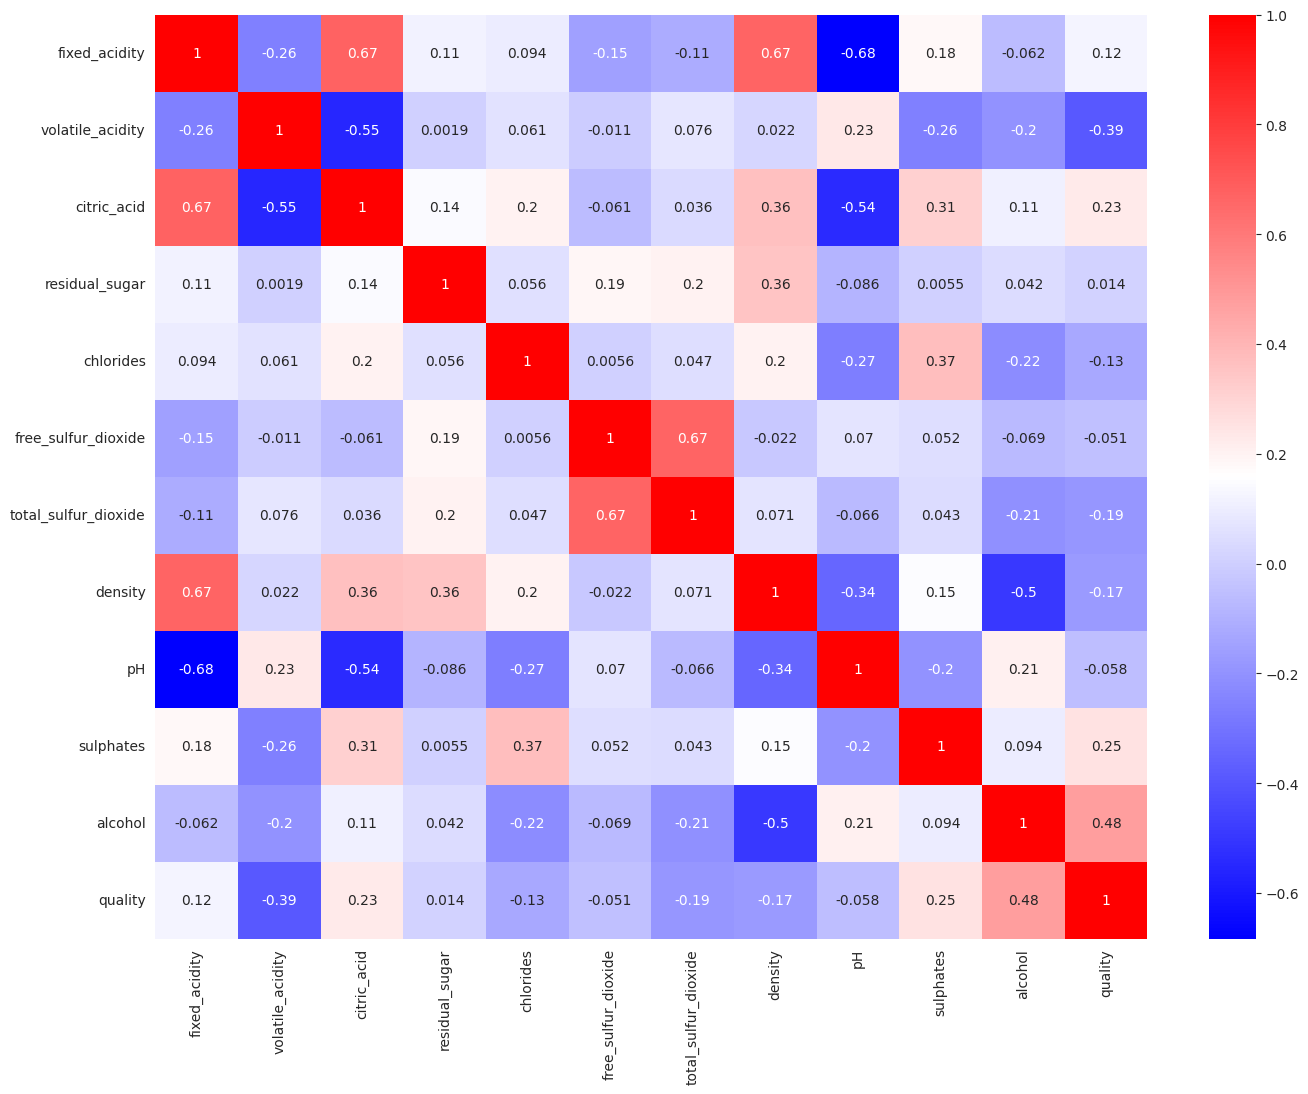

In [32]:
plt.figure(figsize=(16,12))
sns.heatmap(wine_data_corr, cmap="bwr", annot=True)